In [1]:
from rdkit import Chem

import sys
sys.path.append('/home/daniel/wizepair2')
from classes.mmp import MMP

### Example: 2-pyridyl to 1-pyridyl.

Notes: Works, but is there a way to ensure the heteroatom remains on the 'same' side?

In [2]:
mmp = MMP('Cc1cccnc1', 
          'Cc1ccccn1',
          strictness=5, correspondence=2)
response = mmp.execute()

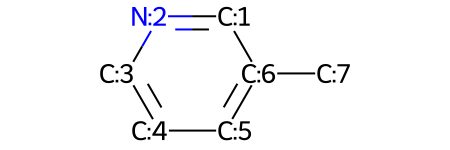

In [3]:
mmp._mol1

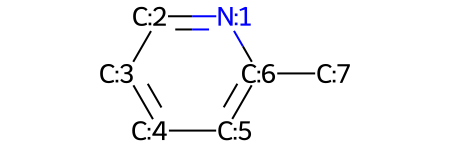

In [4]:
mmp._mol2

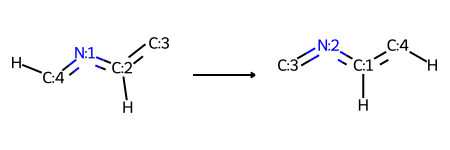

In [5]:
Chem.rdChemReactions.ReactionFromSmarts(response[3]['smirks'])

### Example: 5 -> 6 membered linking heterocycle.

Notes: Surprisingly tricky as it requires correspondence > 1. Error can be ignored due to conjugation.

In [6]:
mmp = MMP('Cc1oc(C)cc1', 
          'Cc1ccc(C)cc1',
          strictness=5, correspondence=2)
response = mmp.execute()

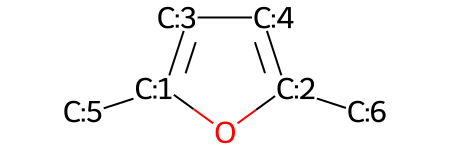

In [7]:
mmp._mol1

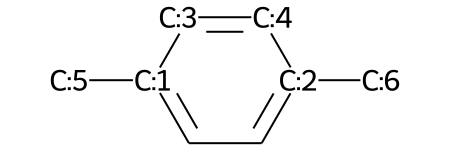

In [8]:
mmp._mol2

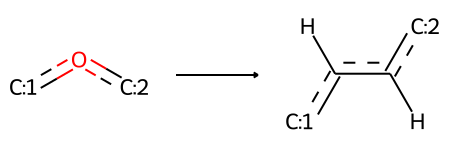

In [9]:
Chem.rdChemReactions.ReactionFromSmarts(response[3]['smirks'])

### Example: Nitro to methyl-ester.

Notes: ^2 term in the atom pairing component of the scoring function ensures the O atoms are mapped correctly here.

In [10]:
mmp = MMP('c1([N+](=O)[O-])ccccc1', 
          'c1(C(=O)OC)ccccc1',
          strictness=5, correspondence=2)
response = mmp.execute()

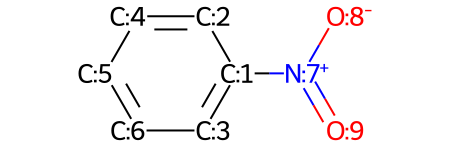

In [11]:
mmp._mol1

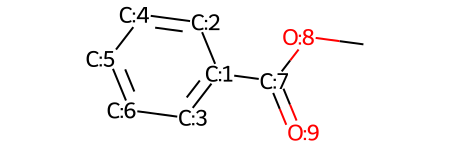

In [12]:
mmp._mol2

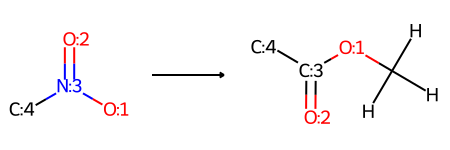

In [13]:
Chem.rdChemReactions.ReactionFromSmarts(response[3]['smirks'])

### Example: Azetidine to piperazine.

Notes: Works, despite how one mapped C appears to be 'floating' where correspondence = 2. This is correct, though users may prefer solution when correspondence = 3.

In [14]:
mmp = MMP('N1CCC1', 
          'N1CCNCC1',
          strictness=5, correspondence=2)
response = mmp.execute()

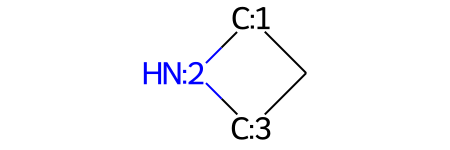

In [15]:
mmp._mol1

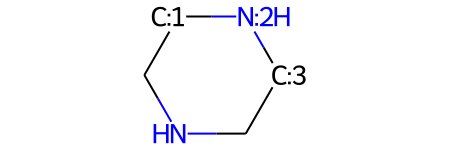

In [16]:
mmp._mol2

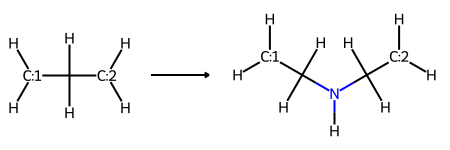

In [17]:
Chem.rdChemReactions.ReactionFromSmarts(response[3]['smirks'])

### Example: Sildenafil to Vardenafil.

Notes: 2 changes mean the SMIRKS fails internal validation, though is correctly mapped and isolated.

In [18]:
mmp = MMP('CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12', 
          'CCCc1nc(C)c2c(=O)nc(-c3cc(S(=O)(=O)N4CCN(CC)CC4)ccc3OCC)[nH]n12',
          strictness=5, correspondence=2)
response = mmp.execute()

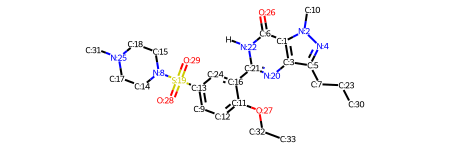

In [19]:
mmp._mol1

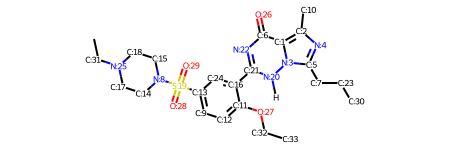

In [20]:
mmp._mol2

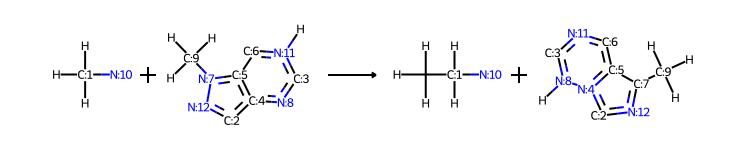

In [21]:
Chem.rdChemReactions.ReactionFromSmarts(response[3]['smirks'])

### Example: L-Adrenaline to Epinephrine

Notes: The chiral hydrogens are excluded from reaction definition.

In [22]:
mmp = MMP('CNC[C@@H](O)c1ccc(O)c(O)c1', 
          'CNC[C@H](O)c1ccc(O)c(O)c1',
          strictness=5, correspondence=2)
response = mmp.execute()

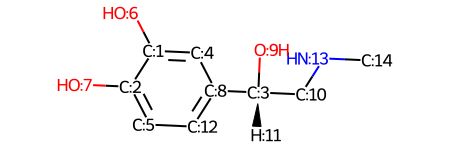

In [23]:
mmp._mol1

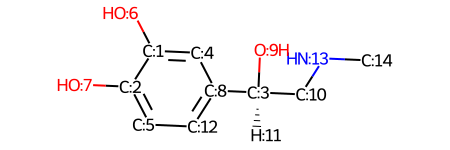

In [24]:
mmp._mol2

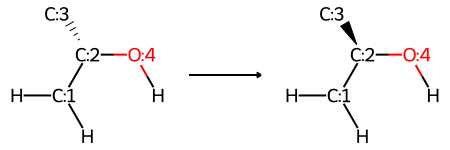

In [25]:
Chem.rdChemReactions.ReactionFromSmarts(response[3]['smirks'])

### Example: Epinephrine to Adrenalone

Notes: Contrary to the example above, in this case it's important the chiral hydrogen is explicitly defined for the reaction to work.

In [26]:
mmp = MMP('CNC[C@H](O)c1ccc(O)c(O)c1', 
          'CNCC(=O)c1ccc(O)c(O)c1',
          strictness=5, correspondence=2)
response = mmp.execute()

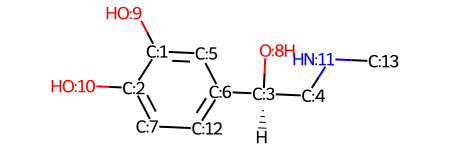

In [27]:
mmp._mol1

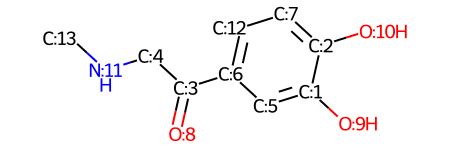

In [28]:
mmp._mol2

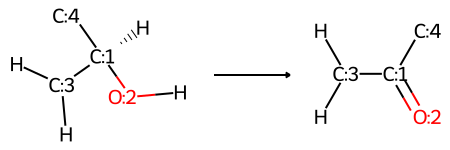

In [29]:
Chem.rdChemReactions.ReactionFromSmarts(response[3]['smirks'])

### Example: CHEMBL1160711 to CHEMBL1160720

Notes: Challenging to isolate where the change 'occurs' with this 3, 4 -> 4, 3 substitution reversal.

In [30]:
mmp = MMP('CC(C)NC[C@H](O)c1ccc(NS(C)(=O)=O)c(O)c1', 
          'CC(C)NC[C@H](O)c1ccc(O)c(NS(C)(=O)=O)c1',
          strictness=5, correspondence=1)
response = mmp.execute()

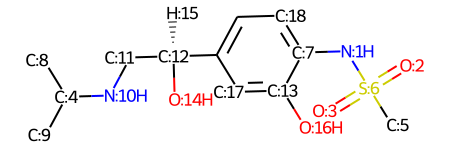

In [31]:
mmp._mol1

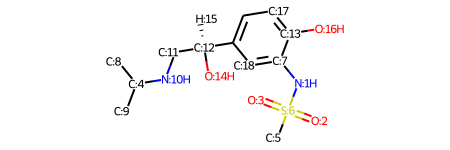

In [32]:
mmp._mol2

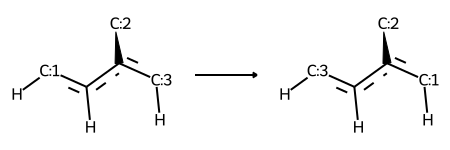

In [33]:
Chem.rdChemReactions.ReactionFromSmarts(response[3]['smirks'])

### Example: Cortisol to Budesonide

Notes: Works on complex fused ring systems such as seteroids.

In [34]:
mmp = MMP('C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C@@H]1CC[C@]2(O)C(=O)CO', 
          'CCCC1O[C@@H]2C[C@H]3[C@@H]4CCC5=CC(=O)C=C[C@]5(C)[C@H]4[C@@H](O)C[C@]3(C)[C@]2(C(=O)CO)O1', 
          strictness=5, correspondence=2)
response = mmp.execute()

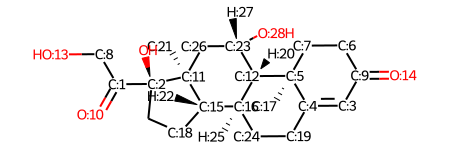

In [35]:
mmp._mol1

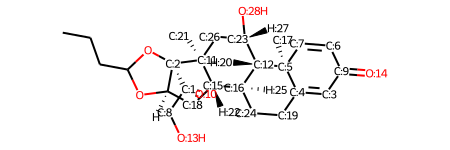

In [36]:
mmp._mol2

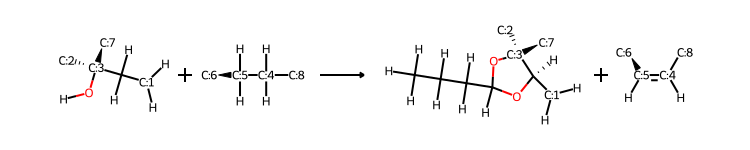

In [37]:
Chem.rdChemReactions.ReactionFromSmarts(response[3]['smirks'])

### Example: Pfizer UK500001 to AstraZeneca PDE4 series

Notes: mono- to bi-cyclic core change right in the centre of the molecule.

In [38]:
mmp = MMP('c1c(F)c(F)ccc1Oc2ncc(F)cc2C(=O)NC3CCC(NC(=O)c4cc(C)ccc4(O))CC3', 
          'c1c(F)cc2C(=O)N(C3CCC(NC(=O)c5cc(C)ccc5(O))CC3)C(=O)N(c4cc(F)c(F)cc4)c2n1', 
          strictness=5,correspondence=1)
response = mmp.execute()

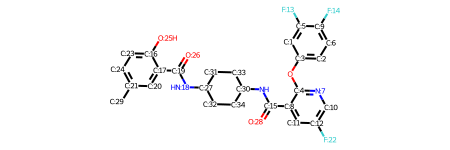

In [39]:
mmp._mol1

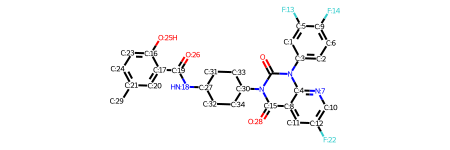

In [40]:
mmp._mol2

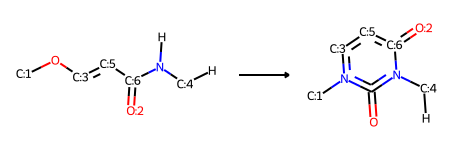

In [41]:
Chem.rdChemReactions.ReactionFromSmarts(response[3]['smirks'])